## INTERESTING POINT MATCHING

In [466]:
import cv2 as cv
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

img1 = io.imread("https://raw.githubusercontent.com/n72537645/Corner-matching/main/13.jpeg")
img2 = io.imread("https://raw.githubusercontent.com/n72537645/Corner-matching/main/14.jpeg")
gray1=cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2=cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)


In [467]:
def cosine_similarity(list_1, list_2):
    cos_sim = np.dot(list_1, list_2) / (np.linalg.norm(list_1) * np.linalg.norm(list_2))
    return cos_sim
# https://www.folkstalk.com/2022/10/cosine-similarity-python-numpy-with-code-examples.html

In [468]:
possible_match=[]
between_who=[]

for i in range(len(des1)):
    for j in range(len(des2)):
        if cosine_similarity(des1[i],des2[j])>0.93:
            possible_match.append(kp1[i])
            between_who.append(kp2[j])


In [469]:
distance_list=[]
for k in  range(len(possible_match)):
    distance=(((possible_match[k].pt)[0]-(between_who[k].pt[0]))**2+((possible_match[k].pt)[1]-((between_who[k].pt[1])+img1.shape[1]))**2)**0.5
    distance_list.append(distance)

checked=[]
avg=np.mean(distance_list)

for i in range(len(distance_list)):
    if distance_list[i]<=avg+40 and distance_list[i]>=avg-40:
        
        checked.append([possible_match[i],between_who[i],distance_list[i]])


In [470]:
angle_list=[]
for k in  range(len(checked)):    
    angle_list.append(abs((checked[k][1].pt[1]-checked[k][0].pt[1])/checked[k][1].pt[0]-checked[k][0].pt[0]))

avg_angle=np.mean(angle_list)

good=[]
for i in range(len(checked)):
    if angle_list[i]<=avg_angle+4 and angle_list[i]>=avg_angle-4:
        
        good.append([checked[i][0],checked[i][1]])


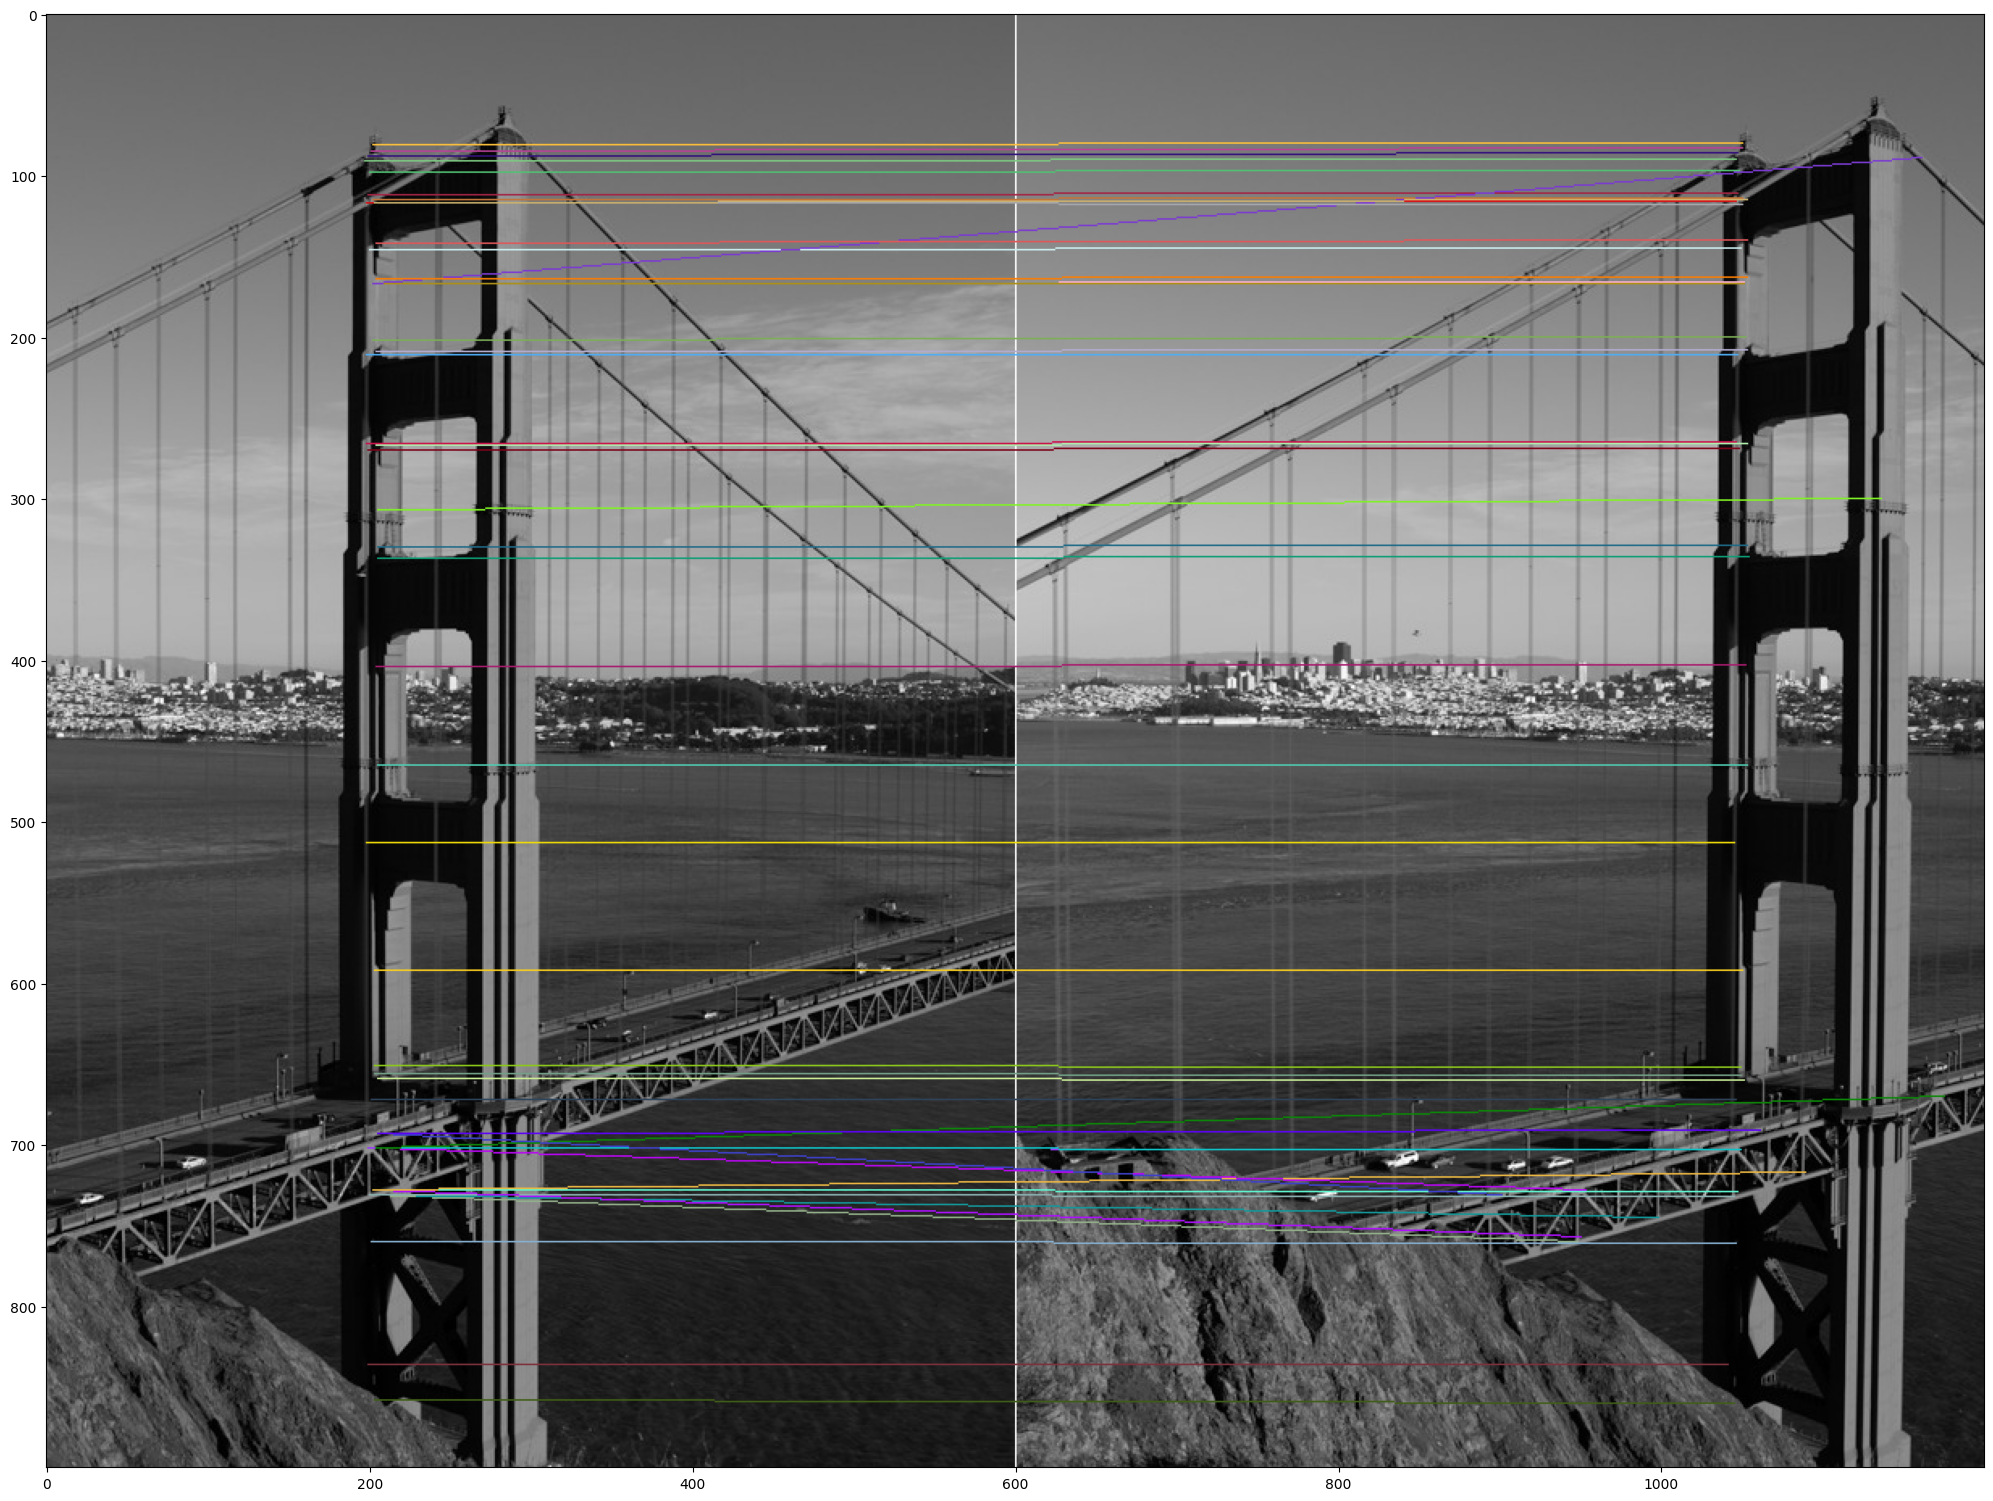

In [471]:
img3 = np.concatenate((img1, img2), axis=1)
plt.figure(figsize=(25,25))
plt.imshow(img3)
img3 = cv.line(img3, (img1.shape[1],0), (img1.shape[1],img1.shape[0]), (255,255,255), 1)

for i in range(len(good)):
    img3 = cv.line(img3, (int(good[i][0].pt[0]), int(good[i][0].pt[1])), 
                   (int(good[i][1].pt[0]+img1.shape[1]), int(good[i][1].pt[1])), 
                   (np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)), 1)

plt.imshow(img3)

https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
https://docs.opencv.org/4.x/d4/d5d/group__features2d__draw.html#ga5d2bafe8c1c45289bc3403a40fb88920
https://docs.opencv.org/3.4/db/d39/classcv_1_1DescriptorMatcher.html
https://docs.opencv.org/3.4/db/d39/classcv_1_1DescriptorMatcher.html#a0f046f47b68ec7074391e1e85c750cba
https://www.geeksforgeeks.org/python-opencv-cv2-line-method/
https://note.nkmk.me/en/python-opencv-hconcat-vconcat-np-tile/


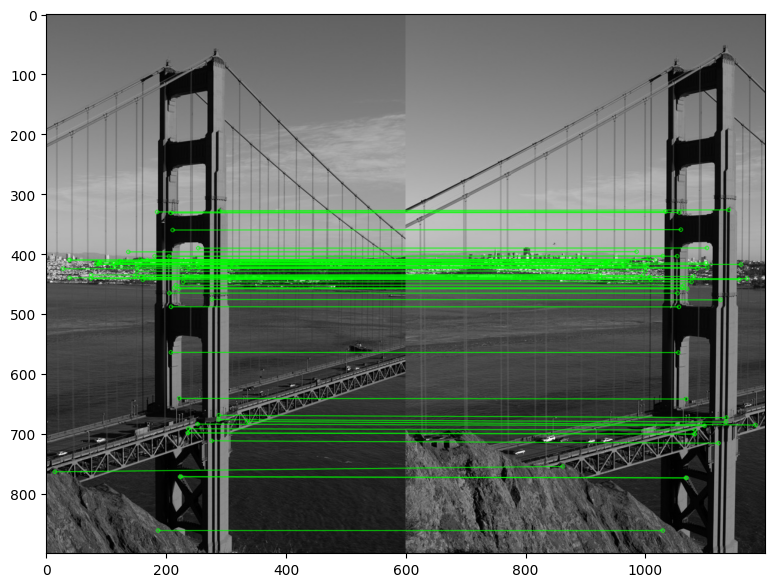

(<matplotlib.image.AxesImage at 0x24a35c0ed70>, None)

In [472]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv.FlannBasedMatcher(index_params, search_params)

#for each desc in desc1, list first and second best match
matches = flann.knnMatch(des1, des2, k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.1*n.distance:
        good.append(m)

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   flags = 2)

img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.figure(figsize = (14,7))
plt.imshow(img3, 'gray'),plt.show()